In [32]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


In [33]:
#import dataset
df = pd.read_csv('D:\CTG.csv')
df = df[['Price']]
df = df.dropna() 
df = df.reset_index(drop=True)
df

,Price
0,10379.9
1,10318.5
2,10257.0
3,10195.6
4,10195.6
...,...
2466,26700.0
2467,26050.0
2468,26500.0
2469,26550.0


In [34]:
#check stationary
from statsmodels.tsa.stattools import adfuller
adf1 = adfuller(df['Price'], regression ='c', maxlag=30)
print("ADF stat: %f" % adf1[0])
print("p-value: %f" % adf1[1])

ADF stat: -1.479024
p-value: 0.543861


In [35]:
#differencing data
adf2 = adfuller(np.diff(df['Price']), regression ='n', maxlag=30)
print("ADF stat: %f" % adf2[0])
print("p-value: %f" % adf2[1])

ADF stat: -51.945950
p-value: 0.000000


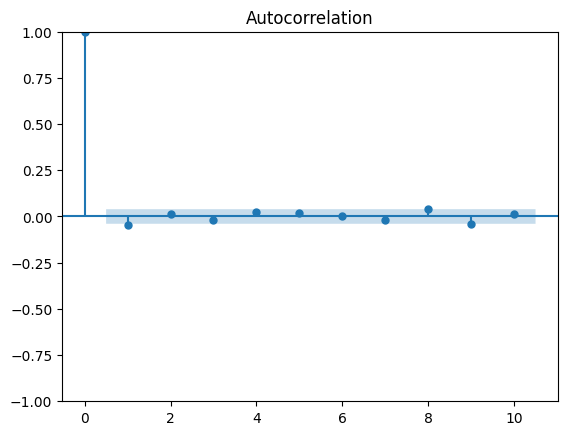

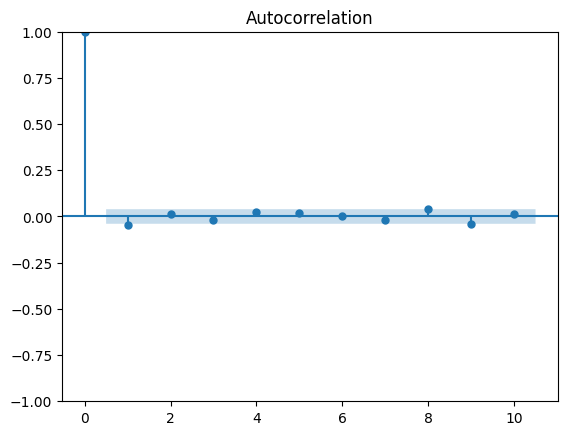

In [36]:
#ACF
sm.tsa.acf(np.diff(df['Price']), nlags=10)
sm.graphics.tsa.plot_acf(np.diff(df['Price']),lags=10)

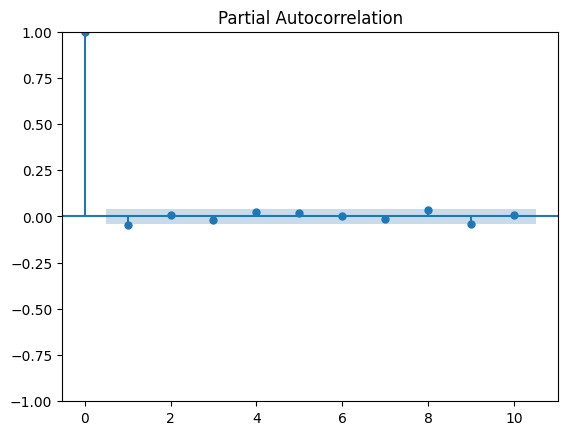

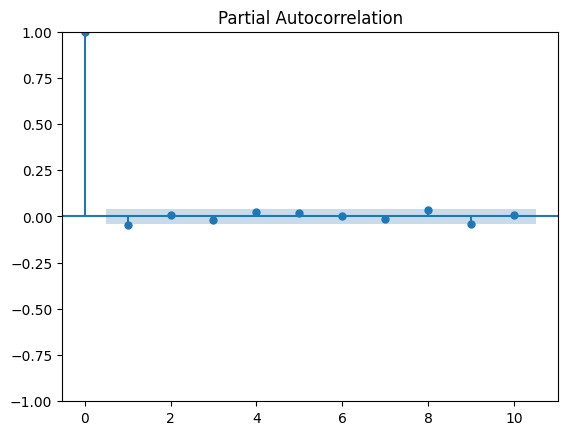

In [37]:
#PACF
sm.tsa.pacf(np.diff(df['Price']), nlags=10)
sm.graphics.tsa.plot_pacf(np.diff(df['Price']),lags=10)

In [38]:
#RATIO 7:3

In [39]:
#data splitting ratio: 7:3
train_size73 = int(0.7 * len(df))
test_size73 = int(0.3 * len(df)) 
train_data73 = df[:train_size73]
test_data73 = df[train_size73 : train_size73 + test_size73]

In [40]:
train_data73


,Price
0,10379.9
1,10318.5
2,10257.0
3,10195.6
4,10195.6
...,...
1724,26242.7
1725,25940.2
1726,25826.7
1727,25978.0


In [41]:
#Training data ratio 7:3
x_train73 = np.array(train_data73.index).reshape(-1, 1)
y_train73 = np.array(train_data73['Price'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

model73 = auto_arima(y_train73, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model_fit73 = model73.fit(y_train73)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=25093.245, Time=0.48 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=25118.618, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=25113.795, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=25114.802, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=25117.813, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=25091.832, Time=0.74 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=25104.495, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=25089.968, Time=0.35 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=25105.487, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=25103.493, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=25089.236, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=25114.143, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=25113.158, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=25104.633, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0

In [42]:
x_train73

array([[   0],
       [   1],
       [   2],
       ...,
       [1726],
       [1727],
       [1728]], dtype=int64)

In [43]:
#Testing process ratio 7:3 
x_test73 = np.array(test_data73.index).reshape(-1, 1)
y_test73 = np.array(test_data73['Price'])
y_pred73 = model73.predict(n_periods=len(y_test73))

In [44]:
#creating prediction for next 30 days ratio 7:3
last_index73 =  df.index[-1]
last_data73 =pd.RangeIndex(start=last_index73, stop=last_index73+30, step=1)

#create an array of 30 integers starting from last index
x_next_30_days73 = np.array(range(last_index73 + 1, last_index73 + 31)).reshape(-1, 1)

#predict the price for the next 30 days.
y_next_30_days73 = model73.predict(len(x_next_30_days73))

#print the prices for the next 30 days.
print('Predicted prices for the next 30 days: ')
print(y_next_30_days73)

Predicted prices for the next 30 days: 
[26119.88216292 26128.94070533 26120.22775034 26128.60830223
 26120.54747212 26128.30077798 26120.84326418 26128.01627051
 26121.11691756 26127.75305713 26121.37008924 26127.50954407
 26121.60431217 26127.28425685 26121.82100458 26127.07583135
 26122.02147856 26126.88300554 26122.20694797 26126.70461187
 26122.37853585 26126.53957015 26122.53728115 26126.38688104
 26122.6841451  26126.24562002 26122.82001695 26126.11493174
 26122.94571941 26125.99402488]


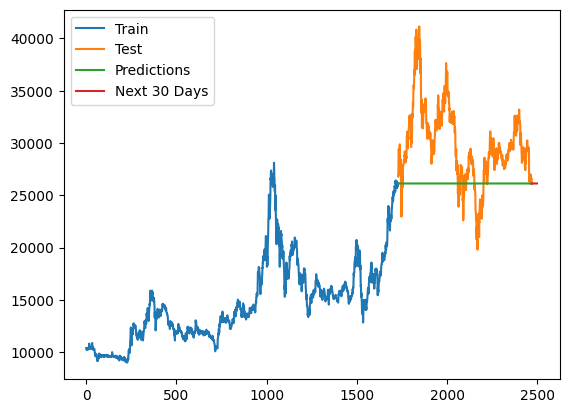

In [45]:
#Show plot ratio 7:3
plt.plot(train_data73.index, train_data73['Price'])
plt.plot(test_data73.index, test_data73['Price'])
plt.plot(test_data73.index, y_pred73)

plt.plot(last_data73,y_next_30_days73)
plt.legend(['Train', 'Test', 'Predictions','Next 30 Days'])
plt.show()

In [46]:
#RATIO 8:2

In [47]:
#data splitting ratio: 8:2
train_size82 = int(0.8 * len(df))
test_size82 = int(0.2 * len(df)) 
train_data82 = df[:train_size82]
test_data82 = df[train_size82 : train_size82 + test_size82]

In [48]:
#Training data ratio 8:2
x_train82 = np.array(train_data82.index).reshape(-1, 1)
y_train82 = np.array(train_data82['Price'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

model82 = auto_arima(y_train82, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model_fit82 = model82.fit(y_train82)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=29485.049, Time=0.53 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=29493.298, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=29492.963, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=29493.190, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=29492.865, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=29483.536, Time=0.60 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=29490.295, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=29481.300, Time=0.42 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=29483.679, Time=0.33 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=29489.454, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=29480.959, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=29492.862, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=29492.645, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=29482.925, Time=0.41 sec
 ARIMA(1,1,2)(0,0,0

In [49]:
#Testing process ratio 8:2 
x_test82 = np.array(test_data82.index).reshape(-1, 1)
y_test82 = np.array(test_data82['Price'])
y_pred82 = model82.predict(n_periods=len(y_test82))

In [50]:
#creating prediction for next 30 days ratio 8:2
last_index82 =  df.index[-1]
last_data82 =pd.RangeIndex(start=last_index82, stop=last_index82 + 30, step=1)

#create an array of 30 integers starting from last index
x_next_30_days82 = np.array(range(last_index82 + 1, last_index82 + 31)).reshape(-1, 1)

#predict the price for the next 30 days.
y_next_30_days82 = model82.predict(len(x_next_30_days82))

#print the prices for the next 30 days.
print('Predicted prices for the next 30 days: ')
print(y_next_30_days82)

Predicted prices for the next 30 days: 
[33916.4532745  33900.77864606 33915.71147762 33901.48533763
 33915.03823001 33902.12672401 33914.42719703 33902.70884004
 33913.87262946 33903.23716287 33913.36930934 33903.71666353
 33912.91250091 33904.15185365 33912.49790602 33904.54682796
 33912.12162374 33904.90530279 33911.78011362 33905.23065106
 33911.47016236 33905.52593398 33911.18885361 33905.79392987
 33910.93354054 33906.03716034 33910.70182088 33906.25791393
 33910.49151438 33906.45826775]


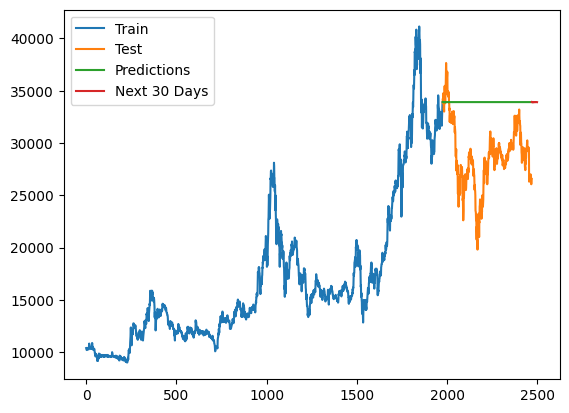

In [51]:
#Show plot ratio 8:2
plt.plot(train_data82.index, train_data82['Price'])
plt.plot(test_data82.index, test_data82['Price'])
plt.plot(test_data82.index, y_pred82)

plt.plot(last_data82,y_next_30_days82)
plt.legend(['Train', 'Test', 'Predictions','Next 30 Days'])
plt.show()

In [52]:
#RATIO 9:1

In [53]:
#data splitting ratio: 9:1
train_size91 = int(0.9 * len(df))
test_size91 = int(0.1 * len(df)) 
train_data91 = df[:train_size91]
test_data91 = df[train_size91 : train_size91+ test_size91]

In [54]:
#Training data ratio 9:1
x_train91 = np.array(train_data91.index).reshape(-1, 1)
y_train91 = np.array(train_data91['Price'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

model91 = auto_arima(y_train91, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model_fit91 = model91.fit(y_train91)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=33591.246, Time=0.88 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=33591.716, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=33590.893, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=33590.935, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=33590.340, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=33587.992, Time=0.39 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=33594.805, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=33594.861, Time=0.13 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=33592.851, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=33592.793, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=33586.501, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=33589.609, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=33589.568, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=33593.469, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0

In [55]:
#Testing process ratio 9:1 
x_test91 = np.array(test_data91.index).reshape(-1, 1)
y_test91 = np.array(test_data91['Price'])
y_pred91 = model91.predict(n_periods=len(y_test91))

In [56]:
#creating prediction for next 30 days ratio 9:1
last_index91 =  df.index[-1]
last_data91 =pd.RangeIndex(start=last_index91, stop=last_index91 + 30, step=1)

#create an array of 30 integers starting from last index
x_next_30_days91 = np.array(range(last_index91 + 1, last_index91 + 31)).reshape(-1, 1)

#predict the price for the next 30 days.
y_next_30_days91 = model91.predict(len(x_next_30_days91))

#print the prices for the next 30 days.
print('Predicted prices for the next 30 days: ')
print(y_next_30_days91)

Predicted prices for the next 30 days: 
[27654.36875564 27650.20639786 27654.17210886 27650.39375425
 27653.99360395 27650.56382586 27653.83156722 27650.71820731
 27653.68447938 27650.85834612 27653.5509613  27650.98555626
 27653.42976109 27651.10103048 27653.31974234 27651.20585149
 27653.2198735  27651.30100212 27653.12921818 27651.38737452
 27653.04692637 27651.46577853 27652.97222648 27651.53694928
 27652.90441812 27651.6015541  27652.8428655  27651.66019872
 27652.78699149 27651.71343301]


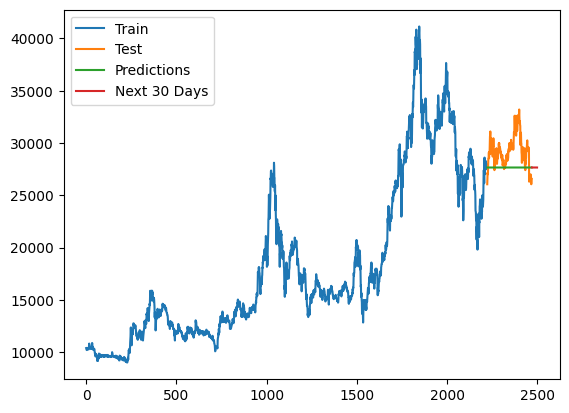

In [57]:
#Show plot ratio 9:1
plt.plot(train_data91.index, train_data91['Price'])
plt.plot(test_data91.index, test_data91['Price'])
plt.plot(test_data91.index, y_pred91)

plt.plot(last_data91,y_next_30_days91)
plt.legend(['Train', 'Test', 'Predictions','Next 30 Days'])
plt.show()

In [58]:
#ACCURACY EVALUATION

In [59]:
#method to calculate mape
def calc_mape(actual, predicted):

    # Convert to numpy arrays
    actual = np.array(actual)
    predicted = np.array(predicted)
    
    # Calculate absolute percentage error
    absolute_error = np.abs((actual - predicted) / actual)
    
    # Handle division by zero cases
    absolute_error[np.isinf(absolute_error)] = 0.0
    
    # Calculate mean absolute percentage error
    mape = np.mean(absolute_error) * 100
    
    return mape

In [60]:
#accuracy evaluate 7:3
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_log_error as msle

test_rmse73 = np.sqrt(np.mean((y_pred73 - y_test73)**2))
test_mape73 = calc_mape(y_test73, y_pred73)
test_mae73 = mae(y_test73, y_pred73)
test_msle73 = msle(y_test73, y_pred73)

print(test_rmse73)
print(test_mape73)
print(test_mae73)
print(test_msle73)

5219.372136585437
13.400638978679805
4237.514981203419
0.030707788134495123


In [61]:
#accuracy evaluate 8:2
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_log_error as msle


test_rmse82 = np.sqrt(np.mean((y_pred82 - y_test82)**2))
test_mape82 = calc_mape(y_test82, y_pred82)
test_mae82 = mae(y_test82, y_pred82)
test_msle82 = msle(y_test82, y_pred82)


print(test_rmse82)
print(test_mape82)
print(test_mae82)
print(test_msle82)

5987.446309892434
19.72873683351008
5310.095155387926
0.04068657043821969


In [62]:
#accuracy evaluate 9:1
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_log_error as msle

test_rmse91 = np.sqrt(np.mean((y_pred91 - y_test91)**2))
test_mape91 = calc_mape(y_test91, y_pred91)
test_mae91 = mae(y_test91, y_pred91)
test_msle91 = msle(y_test91, y_pred91)


print(test_rmse91)
print(test_mape91)
print(test_mae91)
print(test_msle91)

2208.0965257288885
5.983077344732776
1805.1272588069014
0.005681634595759574
